# Cohort Analysis
A cohort is a group of people sharing something in common, such as the sign-up date to an app, the month of the first purchase, geographical location, acquisition channel (organic users, coming from performance marketing, etc.) and so on. In Cohort Analysis, we track these groups of users over time, to identify some common patterns or behaviors. By seeing how the groups behave over time, we can more or less observe if our efforts had some effects on the users and observe the impact of changes to the product on the user behavior.

When carrying out the cohort analysis, it is crucial to consider the relationship between the metric we are tracking and the business model. There are many matrics to track, such as retention, conversion rate, ROI, etc.

Types of Cohorts:
- Time Cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.
- Behaovior cohorts are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.
- Size cohorts refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.

The datasee is downloaded from UCI Machine Learning Repository. The dataset can be briefly described as: “This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.”

In [2]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df=pd.read_excel(r'...Online Retail.xlsx')
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
# check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# due to the fact that we need to have the customer IDs, we dropped all the rows without them.
df= df.dropna(subset=['CustomerID'])

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# check and drop the duplicate values 
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


From the table above, we can see that there are orders with negative quantity — most likely returns. We see that 1.97% of cutomers have made the return, which is a resonable amount given that we have 536641 orders in total and it is a huge number.

In [11]:
n_return=np.sum(df['Quantity'] < 0)/len(df)
print(f'{100 * n_return:.2f}% of customers ordered more than once.')

2.21% of customers ordered more than once.


In [12]:
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

69.97% of customers ordered more than once.


We can see that 65.57% of customers ordered more than once. This means that there will be at least some retention. From the plot below, we can see that there are small number of customers who ordered more than 50 times.

Text(0, 0.5, '# of customers')

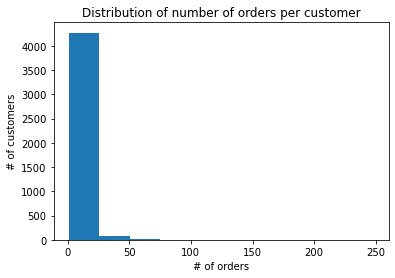

In [13]:
plt.hist(n_orders)
plt.title('Distribution of number of orders per customer')
plt.xlabel("# of orders")
plt.ylabel("# of customers")

## Cohort Analysis

We use the first purchase date contained in the dataset as the first time of a given client since the dataset we are using for this example does not contain the customer sign-up date — the date when they registered with the retailer. 

In [14]:
#truncated month of the purchase date
df['order_month']=df['InvoiceDate'].dt.to_period('M')
# the monthly cohort based on the first purchase date (calculated per customer)
df['cohort']=df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [15]:
df['order_month']

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: order_month, Length: 401604, dtype: period[M]

In [16]:
df['cohort']

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-08
541905    2011-08
541906    2011-08
541907    2011-08
541908    2011-08
Name: cohort, Length: 401604, dtype: period[M]

In [17]:
df.groupby('CustomerID')['InvoiceDate'].transform('min')

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-08-18 15:44:00
541905   2011-08-18 15:44:00
541906   2011-08-18 15:44:00
541907   2011-08-18 15:44:00
541908   2011-08-18 15:44:00
Name: InvoiceDate, Length: 401604, dtype: datetime64[ns]

In [18]:
# aggregate the data per cohort and order_month and count the number of unique customers in each group
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_cohort

,cohort,order_month,n_customers
0,2010-12,2010-12,948
1,2010-12,2011-01,362
2,2010-12,2011-02,317
3,2010-12,2011-03,367
4,2010-12,2011-04,341
...,...,...,...
86,2011-10,2011-11,93
87,2011-10,2011-12,46
88,2011-11,2011-11,321
89,2011-11,2011-12,43


In [21]:
# number of periods between the cohort month and the month of the purchase

from operator import attrgetter
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort['period_number'] 

0     0
1     1
2     2
3     3
4     4
     ..
86    1
87    2
88    0
89    1
90    0
Name: period_number, Length: 91, dtype: int64

In [22]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

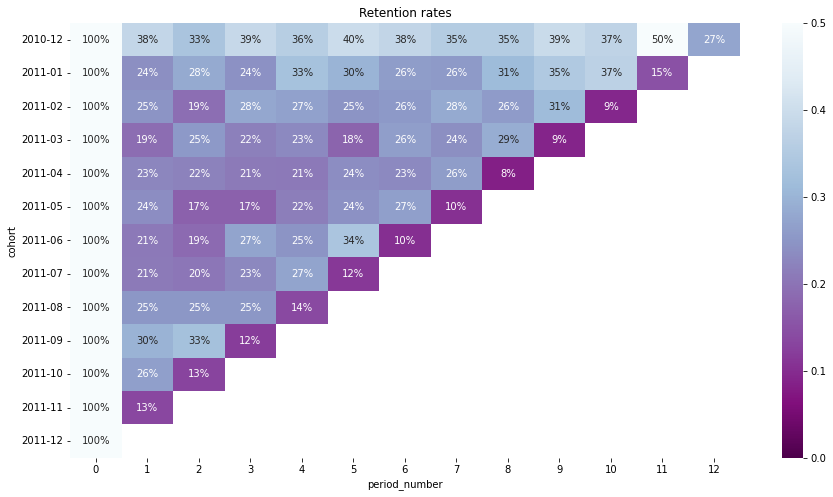

In [26]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention_matrix,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

In the image, we can see that there is a sharp drop-off in the second month (indexed as 1) already. The first cohort (2010–12) seems to be an exception and performs surprisingly well as compared to the other ones. A year after the first purchase, there is a 50% retention. 
Throughout the matrix, we can see fluctuations in retention over time. This might be caused by the characteristics of the business. If the business depends heavily on retenting customers, we should focus on customer engagement and keep the customers engaged after their made the first purchase. Since 2010-12 performs suprisingly well, it is worthwile to study what marketing tactics had been used around that time. For 2011-11 cohort which results in less retention rate, it also worthwhile to invesigate what massages or marketing tactics had been used as it would told us what our customers don't like.